In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

In [2]:
print("Dataset Overview:")
df.head()

Dataset Overview:


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
# To find the total null values in the dataset
df.isnull().sum()


Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [5]:
# To remove rows with missing values
df = df.dropna()  

In [16]:
# The forward fill method fill missing values in Mental_Health_Condition from the previous row
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].ffill()

In [15]:
# Fill missing values in Physical_Activity with the mode
df['Physical_Activity'] = df['Physical_Activity'].fillna(df['Physical_Activity'].mode()[0])

In [17]:
# Check the number of null values again
df.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [18]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        2577 non-null   object
 1   Age                                2577 non-null   int64 
 2   Gender                             2577 non-null   object
 3   Job_Role                           2577 non-null   object
 4   Industry                           2577 non-null   object
 5   Years_of_Experience                2577 non-null   int64 
 6   Work_Location                      2577 non-null   object
 7   Hours_Worked_Per_Week              2577 non-null   int64 
 8   Number_of_Virtual_Meetings         2577 non-null   int64 
 9   Work_Life_Balance_Rating           2577 non-null   int64 
 10  Stress_Level                       2577 non-null   object
 11  Mental_Health_Condition            2577 non-null   object
 12  Access_to_M

In [19]:
# No null values and most prevalent values are numeric
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,40.910749,17.760574,39.634459,7.446643,2.985642,3.004269,3.001552
std,11.258183,9.981957,11.886100,4.592684,1.413454,1.388304,1.394866
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,3.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,39.000000,7.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,11.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


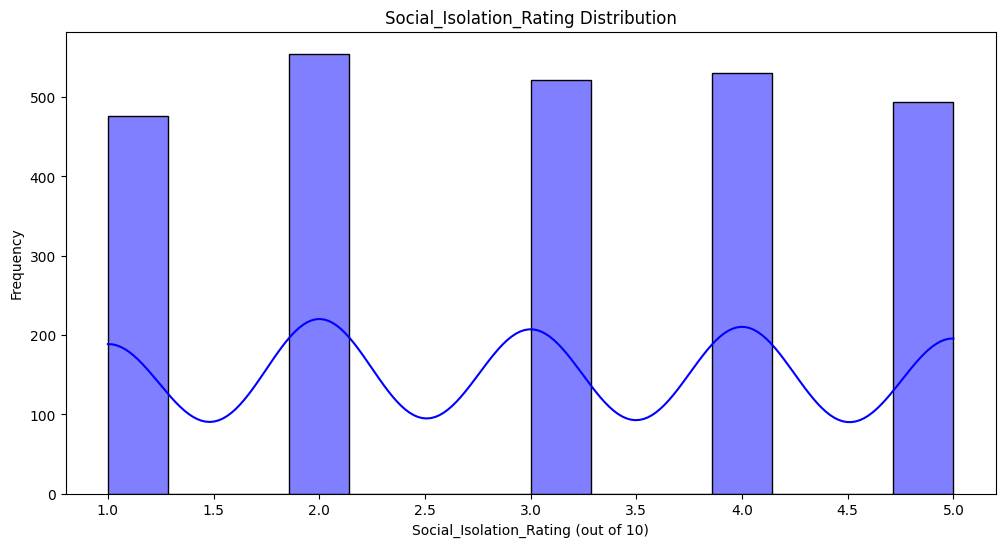

In [24]:
# Univariate distributions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Plot distribution of Work-Life Balance Ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['Social_Isolation_Rating'], kde=True, color='blue')
plt.title("Social_Isolation_Rating Distribution")
plt.xlabel("Social_Isolation_Rating (out of 10)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# The graph shows that Social_Isolation_Rating is concentrated at distinct values (1 to 5), indicating that employees tend to rate their isolation in discrete categories rather than on a continuous scale. The nearly even distribution suggests that social isolation experiences vary widely among employees.

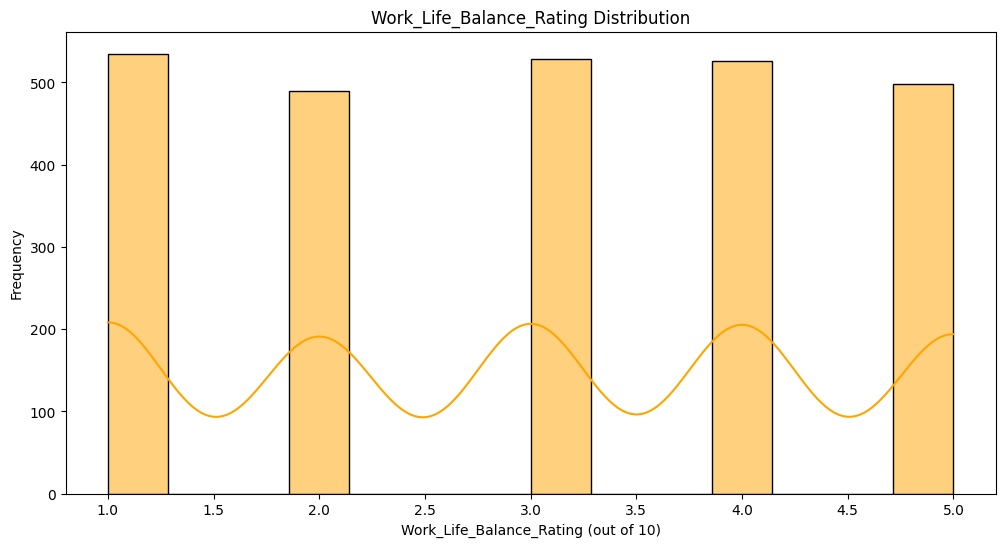

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Work_Life_Balance_Rating'], kde=True, color='orange')
plt.title("Work_Life_Balance_Rating Distribution")
plt.xlabel("Work_Life_Balance_Rating (out of 10)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# The graph shows that Work_Life_Balance_Rating is distributed across five distinct values (1 to 5), indicating that employees tend to rate their work-life balance in discrete categories. The nearly even distribution suggests a balanced spread of opinions

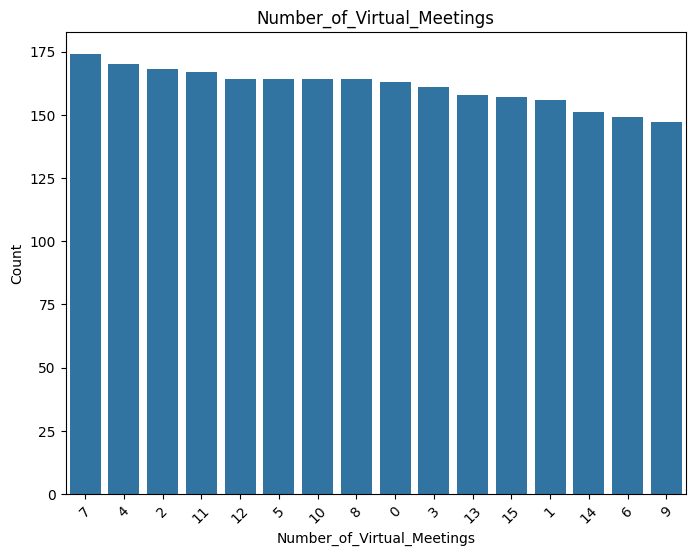

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Industry', order=df['Number_of_Virtual_Meetings'].value_counts().index)
plt.title("Number_of_Virtual_Meetings")
plt.xlabel("Number_of_Virtual_Meetings")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()